In [1]:
import pandas as pd
import random
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import datetime
import matplotlib.ticker as mtick
conn = sqlite3.connect('test_database')
c = conn.cursor()

Three available tables to choose from:<br>

reliability_table<br>
schedule_table<br>
components_table<br>

# Suppliers in Each Material Group

In [10]:
query = """
SELECT * 
    FROM reliability_table
"""
df = pd.read_sql_query(query,conn)

dic = {}
for pos, group in enumerate(df['Material_Group']):
    if group not in dic:
        dic[group] = [df['Supplier'].iloc[pos]]
    elif df['Supplier'].iloc[pos] in dic[group]:
        continue
    else:
        dic[group] += [df['Supplier'].iloc[pos]]

# creates excel file
new = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dic.items() ]))
new.to_excel('Supplier_Groups.xlsx')



{'018': ['MANSCO A DIVISION OF FASTENAL', 'FASTENAL CO'],
 '073': ['ROYAL TECHNOLOGIES CORPORATION',
  'MEDWAY PLASTICS CORP',
  'B AND V MECHANICAL INC',
  'H&L ADVANTAGE',
  'ORANGEBOX LTD',
  'STEELCASE ASIA PACIFIC LTD'],
 '057': ['DESIGNTEX  GROUP INC',
  'MAHARAM FABRIC CORPORATION',
  'MAYER-PAETZ INC',
  'B AND V MECHANICAL INC',
  'ELMO SWEDEN AB',
  'LDI CORPORATION',
  'TSG FINISHING LLC',
  'KRUEGER INTERNATIONAL INC',
  'KVADRAT INC',
  'MOMENTUM GROUP',
  'STEELCASE COM',
  'ULTRAFABRICS INC',
  'APPLIED INDUSTRIAL TECH',
  'SPINNEYBECK ENTERPRISES INC',
  'TEKNION LLC',
  'LUNA TEXTILES',
  'POLLACK & ASSOCIATES',
  'H B F TEXTILES',
  'WOLF GORDON INC',
  'MAJILITE',
  'ICF UNIKA VAEV',
  'KNOLL NORTH AMERICA INC',
  'DUVALTEX US INC',
  'MOMENTUM TEXTILES',
  'GABRIEL NORTH AMERICA INC',
  'ANCHOR WIPING CLOTH COMPANY'],
 '013': ['SHORELINE CONTAINER LLC',
  'JEMNI INC',
  'GREAT LAKES LABEL LLC',
  'SILAS DISTRIBUTORS INC',
  'EAM-MOSCA CORP',
  'B AND V MECHANICAL IN

# Parts in Each Material Group

In [89]:
query = """
SELECT Material_Group, Material, Part_Desciption
    FROM reliability_table
INNER JOIN components_table on components_table.Part_Number =  reliability_table.Material
"""
df = pd.read_sql_query(query,conn)

dic = {}
for pos, group in enumerate(df['Material_Group']):
    if group not in dic:
        dic[group] = [df['Part_Desciption'].iloc[pos]]
    if df['Part_Desciption'].iloc[pos] in dic[group]:
        continue
    else:
        dic[group] += [df['Part_Desciption'].iloc[pos]]
                       
dic

# creates excel file
new = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dic.items() ]))
new.to_excel('Material_Groups.xlsx')

# Supplier Late Percentage

In [4]:
query = """
SELECT * 
    FROM reliability_table
"""
df = pd.read_sql_query(query,conn)

new = df[['Supplier', 'Scheduled_relevant_delivery_date', 'Posting_Date']]

dic = {}

# creating a dic to count the number of times a delivery was late by supplier

for pos, supplier in enumerate(new['Supplier']):
    if supplier not in dic:
        dic[supplier] = 0
    try:
        if new.iloc[pos,1] < new.iloc[pos,2]:
            dic[supplier] += 1
    except:
        continue


supplier_total = new.groupby('Supplier')['Supplier'].count()

for supplier in dic:
    
    dic[supplier] /= supplier_total.loc[supplier]

# Material Group Late Percentage

In [80]:
query = """
SELECT Material_Group, Scheduled_relevant_delivery_date, Posting_Date
    FROM reliability_table
"""
df = pd.read_sql_query(query,conn)

dic = {}

# creating a dic to count the number of times a delivery was late by supplier

for pos, group in enumerate(df['Material_Group']):
    if (group not in dic) & (group != None):
        dic[group] = 0
    try:
        if df.iloc[pos,1] < df.iloc[pos,2]:
            dic[group] += 1
    except:
        continue


material_total = df.groupby('Material_Group')['Material_Group'].count()

for group in dic:
    
    dic[group] /= material_total.loc[group]
    
new = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dic.items() ]))
new.to_excel('Material_Late.xlsx')

material_total

Material_Group
001       148
002       228
005        53
008       126
009       433
010        56
011        37
012      1595
013      6109
014       641
017      2291
018     11390
021       362
027        10
030       861
032      1035
040       375
041       481
047       243
048      1032
054        92
056       154
057      2332
059       476
060      3425
061         4
073     31199
080         2
098        66
X701        6
X703       19
X704       27
X706       51
X707       16
X708        7
X709      214
X711      249
X712        9
X713       66
X714      321
X715        9
X717        6
X721       12
X722       71
X725       44
X726        1
X727       10
Name: Material_Group, dtype: int64

# Days Late for Each Supplier

In [5]:
query = """
SELECT 
    supplier, 
    Scheduled_relevant_delivery_date,
    Posting_Date
FROM reliability_table
"""
df = pd.read_sql_query(query,conn)

df['Scheduled_relevant_delivery_date'] =  pd.to_datetime(df['Scheduled_relevant_delivery_date'], format='%Y-%m-%d %H:%M:%S')
df['Posting_Date'] =  pd.to_datetime(df['Posting_Date'], format='%Y-%m-%d %H:%M:%S')

dic = {}
for pos, supplier in enumerate(df['Supplier']):
    if (supplier not in dic) & (df.iloc[pos,2] > df.iloc[pos,1]):
        dic[supplier] = [df.iloc[pos,2] - df.iloc[pos,1]]
    elif df.iloc[pos,2] > df.iloc[pos,1]:
        dic[supplier] += [df.iloc[pos,2] - df.iloc[pos,1]]
    else:
        continue
        
        
# Converting days late from timedelta function to integers
for supplier in dic:
    dic[supplier] = pd.Series(dic[supplier]).dt.days



{'ROYAL TECHNOLOGIES CORPORATION': [Timedelta('1 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('2 days 00:00:00'),
  Timedelta('7 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('8 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('9 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('8 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('3 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('6 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('43 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('3 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('15 days 00:00:00'),
  Timedelta('44 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  Timedelta('1 days 00:00:00'),
  T

# Days Late for Each Material Group

In [88]:
query = """
SELECT Material_Group, Scheduled_relevant_delivery_date, Posting_Date
    FROM reliability_table
"""
df = pd.read_sql_query(query,conn)


df['Scheduled_relevant_delivery_date'] =  pd.to_datetime(df['Scheduled_relevant_delivery_date'], format='%Y-%m-%d %H:%M:%S')
df['Posting_Date'] =  pd.to_datetime(df['Posting_Date'], format='%Y-%m-%d %H:%M:%S')

dic = {}
for pos, group in enumerate(df['Material_Group']):
    if (group not in dic) & (df.iloc[pos,2] > df.iloc[pos,1]):
        dic[group] = [df.iloc[pos,2] - df.iloc[pos,1]]
    elif df.iloc[pos,2] > df.iloc[pos,1]:
        dic[group] += [df.iloc[pos,2] - df.iloc[pos,1]]
    else:
        continue
        
        
# Converting days late from timedelta function to integers
for group in dic:
    dic[group] = pd.Series(dic[group]).dt.days
    
new = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dic.items() ]))
new.to_excel('Material_Days_Late.xlsx')


# Supplier Trends

In [3]:
query = """
SELECT Supplier, Scheduled_relevant_delivery_date, Posting_Date
    FROM reliability_table
"""
df = pd.read_sql_query(query,conn)

df['Scheduled_relevant_delivery_date'] =  pd.to_datetime(df['Scheduled_relevant_delivery_date'], format='%Y-%m-%d %H:%M:%S')
df['Posting_Date'] =  pd.to_datetime(df['Posting_Date'], format='%Y-%m-%d %H:%M:%S')

late = []
for pos, supplier in enumerate(df['Supplier']):
    if df.iloc[pos,1] < df.iloc[pos,2]:
        late.append(0)
    else:
        late.append(1)
        
df['Late'] = pd.Series(late)
df


,Supplier,Scheduled_relevant_delivery_date,Posting_Date,Late
0,MANSCO A DIVISION OF FASTENAL,2019-09-10,2019-09-10,1
1,ROYAL TECHNOLOGIES CORPORATION,2021-05-13,2021-05-13,1
2,ROYAL TECHNOLOGIES CORPORATION,2019-07-10,2019-07-11,0
3,ROYAL TECHNOLOGIES CORPORATION,2020-06-17,2020-06-17,1
4,MEDWAY PLASTICS CORP,2021-02-22,2021-02-23,0
...,...,...,...,...
67279,ROYAL TECHNOLOGIES CORPORATION,2019-12-05,2019-12-04,1
67280,GERBER SCIENTIFIC INT'L INC,2021-06-04,2021-05-25,1
67281,ROYAL TECHNOLOGIES CORPORATION,2019-09-03,2019-08-30,1
67282,MANSCO A DIVISION OF FASTENAL,2020-07-10,2020-07-09,1


In [4]:
# df.groupby([pd.Grouper(key = 'Posting_Date', freq = 'M')]).mean()
# df.drop(df.loc[df['Posting_Date'] == 'NaT'])

trends = {}
bad = []
for supplier in df['Supplier'].unique():
    try:
        trends[supplier] = df[['Posting_Date', 'Late']].loc[df['Supplier'] == supplier].groupby([pd.Grouper(key = 'Posting_Date', freq = 'M')]).agg(['mean', 'count'])
        trends[supplier]['Change'] = trends[supplier][('Late', 'count')]/trends[supplier][('Late', 'count')].shift(1)
        
    except:
        bad.append(supplier)
        



In [8]:
for sup in trends:
    x = trends[sup].index.values
    y1 = trends[sup][('Late', 'mean')]
    y2 = trends[sup][('Late', 'count')]/trends[sup][('Late', 'count')].sum()
    plt.style.use("seaborn")
    plt.plot_date(x, y1, linestyle = "solid", color = 'blue')
    plt.plot_date(x, y2, linestyle = "solid", color = 'orange')
    plt.ylabel('On Time Percentage')
    plt.title(f"{sup}")
    plt.xlim([datetime.date(2018,1,1),datetime.date(2022,12,31)])
    plt.ylim([0,1.1])
    plt.savefig(f"Filtered_Graphs/{sup}.pdf")
    plt.clf()

<Figure size 800x550 with 0 Axes>

# Correlation between Monthly Reliability and On Time

In [27]:
# need to use supplier trends code to use this

dfs = []
keys = []
newdic = {}
for pos, sup in enumerate(trends):
    if pos == 0:
        df = pd.DataFrame({'date': trends[sup].index.values, 'mean': trends[sup][('Late', 'mean')].values,
                       'count': trends[sup][('Late', 'count')].values, 'change': trends[sup]['Change'].values},
                        index = range(0, len(trends[sup]['Change'])))
        length = len(trends[sup]['Change'])
        
    if pos > 0:
        df = pd.DataFrame({'date': trends[sup].index.values, 'mean': trends[sup][('Late', 'mean')].values,
                       'count': trends[sup][('Late', 'count')].values, 'change': trends[sup]['Change'].values},
                        index = range(length, length + len(trends[sup]['Change'])))
                          
        length = len(trends[sup]['Change'])
#     trends[sup]['avg_deliveries'] = trends[sup][('Late', 'count')]/trends[sup][('Late', 'count')].sum()
        
    if len(df['change']) < 3:
        continue
        
    else:
        dfs.append(df)
        keys.append(sup)
    

data = pd.concat(dfs, keys = keys)
data = data.dropna()

data = data.drop(data.loc[data['change'] > 1000].index)
# data = data.drop(data.loc[data['change'] < .4].index)

a = data.loc['ROYAL TECHNOLOGIES CORPORATION']
np.corrcoef(a['mean'], a['change'])[0][1]

# plt.scatter(data['avg_deliveries'], data[('Late', 'mean')])
# plt.show()


    

0.1184608718803761

In [31]:
query = """
SELECT Supplier, Scheduled_relevant_delivery_date, Posting_Date
    FROM reliability_table
"""
sample = pd.read_sql_query(query,conn)

dic = {}
for supplier in sample['Supplier'].unique():
    try:
        a = data.loc[supplier]
        dic[supplier] = np.corrcoef(a['mean'], a['change'])[0][1]
    
    except:
        continue
                                
pd.DataFrame(dic, index = dic.keys())
dic
    
    

/Users/christianmattei/opt/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/christianmattei/opt/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/christianmattei/opt/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/christianmattei/opt/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/christianmattei/opt/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


{'MANSCO A DIVISION OF FASTENAL': 0.04922434342483908,
 'ROYAL TECHNOLOGIES CORPORATION': 0.1184608718803761,
 'MEDWAY PLASTICS CORP': 0.05907323292209901,
 'DESIGNTEX  GROUP INC': -0.19902705122478748,
 'SHORELINE CONTAINER LLC': 0.18831872518083817,
 'GRAND RAPIDS FOAM TECHNOLOGIES': 0.05352758309801167,
 'EMILSIDER MECCANICA SPA': 0.23494472878245168,
 'KENDALL ELECTRIC INC': 0.06423252262465722,
 'KVADRAT INC': 0.31311765398516933,
 'MJ FOLEY CO': -0.04851890530822418,
 'ERVINS GROUP LLC': 0.0026476025553380856,
 'SPECTRUM INDUSTRIES INC': -0.10259022079665266,
 'ACTION INDUSTRIAL SUPPLY CO': -0.07924431441771007,
 'MOTION INDUSTRIES INC': 0.14610402568890662,
 'JEMNI INC': -0.24371761466681202,
 'MAHARAM FABRIC CORPORATION': 0.0029854111001474002,
 'SAMHONGSA CO LTD': 0.11804739411894984,
 'B AND V MECHANICAL INC': 0.13074344953275027,
 'R S HUGHES CO INC': -0.45319039546353596,
 'ANCHOR WIPING CLOTH COMPANY': -0.11846160439744743,
 'STEELCASE ASIA PACIFIC LTD': 0.1270084351144297

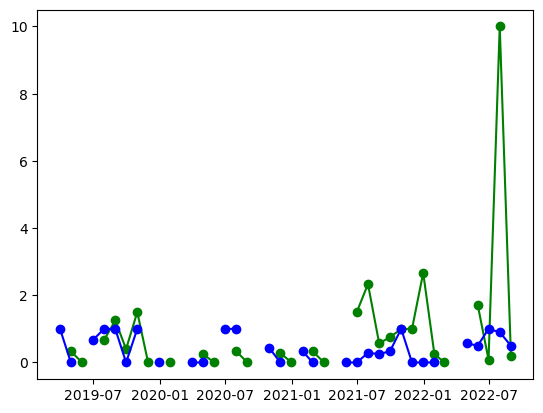

In [41]:
x = trends['EMILSIDER MECCANICA SPA'].index.values
y1 = trends['EMILSIDER MECCANICA SPA']['Change']
y2 = trends['EMILSIDER MECCANICA SPA'][('Late', 'mean')]

plt.plot_date(x, y1, linestyle = "solid", color = 'green')
plt.plot_date(x, y2, linestyle = "solid", color = 'blue')
